### Options:
* DataAugmentation = 'True'/'False'
    * *To augment data sample while training, to avoid overfit*
* BatchSize = 16/32/64/128
    * *Size of each batch getting fed to the network*
* NumberOfEpochs = 1-*
    * *Number of epochs*

In [ ]:
!python3 'mnist_centralized.py' --ExperimentName="MNIST-Centralized-B64-E100-DA" \
                                --DataAugmentation="True" \
                                --BatchSize=64 \
                                --NumberOfEpochs=100

### Final eval on best hyperparameters

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
import numpy
import sys
import os
sys.path.append('../..')

import experiments.mnistCentralized.mnist_centralized as Experiment

train_generator, valid_generator, test_generator, (val_x, val_y), (test_x, test_y) = Experiment.get_data(32, "False")

base_path = "/mnt/data/FederatedLearning/experiments/mnistCentralized/models"
runs_models = os.listdir(base_path)

results_dict = {}
current_model_index = 0

for run in runs_models:
    epochs_models = os.listdir(f"{base_path}/{run}")
    for epoch in epochs_models:
        current_model_index += 1
        print(f"Evaluating mode : {current_model_index}")
        full_path_model = f"{base_path}/{run}/{epoch}"
        current_model = keras.models.load_model(full_path_model)
        
        # [val_loss, val_tp, val_fp, val_tn, val_fn, val_accuracy, val_presision, val_recall, val_auc, val_prc]
        current_results = current_model.evaluate(valid_generator, batch_size=32, verbose=0)
        results_dict[f"{run}/{epoch}"] = current_results[5]   

#model_name= "model-MNIST-Centralized-B32-E10-Augment=True-2022-05-12"
#model_from_disk = keras.models.load_model(f"models/{model_name}") 

#result = model_from_disk.evaluate(x=val_x, y=val_y , batch_size=32)

### Selected best model

In [ ]:
best_model =  max(results_dict, key=results_dict.get)
print(best_model)
print(results_dict[best_model])

### Apply val set to find best model

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
import numpy
import sys
sys.path.append('../..')

import experiments.mnistCentralized.mnist_centralized as Experiment

_, _, test_generator, (val_x, val_y), (test_x, test_y) = Experiment.get_data(32, "False")

model_name= "MNIST-Centralized-B64-E100/Epoch-97"
model_from_disk = keras.models.load_model(f"models/{model_name}")

result = model_from_disk.evaluate(x=val_x, y=val_y , batch_size=32)

print(f"Experiment model: {model_name}")
print(f"loss={result[0]}\n tp={result[1]}\n fp={result[2]}\n tn={result[3]}\n fn={result[4]}\n accuracy={result[5]}\n presision={result[6]}\n recall={result[7]}\n auc={result[8]}\n prc={result[9]}")

### Apply test set on best model

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
import numpy
import sys
sys.path.append('../..')

import experiments.mnistCentralized.mnist_centralized as Experiment

_, _, _, _, (test_x, test_y) = Experiment.get_data(64, "False")

#load model
model_name= "MNIST-Centralized-B64-E100/Epoch-87"
model_from_disk = keras.models.load_model(f"models/{model_name}")

result = model_from_disk.evaluate(x=test_x, y=test_y , batch_size=64)

print(f"Experiment model: {model_name}")
print(f"loss={result[0]}\n tp={result[1]}\n fp={result[2]}\n tn={result[3]}\n fn={result[4]}\n accuracy={result[5]}\n presision={result[6]}\n recall={result[7]}\n auc={result[8]}\n prc={result[9]}")

In [ ]:
prediction = model_from_disk.predict(val_x)
result_maxed = numpy.argmax(prediction, axis=1)
val_y =  numpy.argmax(val_y, axis=1)

correct = 0
wrong = 0

for ground_index in range(len(val_y)):
    if val_y[ground_index] == result_maxed[ground_index]:
        correct += 1
    else:
        wrong += 1
        

print(f"Correct {correct}")
print(f"Wrong {wrong}")
print(f"total {correct + wrong }")
print(f"accuracy {correct /(correct + wrong) }")

In [ ]:
import os
sys.path.append('../..')

import experiments.mnistCentralized.mnist_centralized as Experiment

batch_size = 32
train_generator, valid_generator, test_generator, (val_x, val_y), (test_x, test_y) = Experiment.get_data(batch_size, "False")

print(f"Training batches count : {train_generator.__len__()}")
print(f"Validation batches count : {valid_generator.__len__()}")
print(f"Test batches count : {test_generator.__len__()}")

### Visualize effect of filters

2022-05-28 12:25:28.356196: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-28 12:25:28.704532: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1549] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22317 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:17:00.0, compute capability: 8.6


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 12, 12, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       7

2022-05-28 12:25:30.461457: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8400


1/1 [==============================] - 2s 2s/step


2022-05-28 12:25:31.362263: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


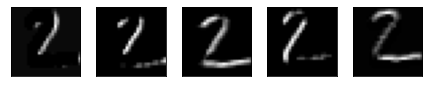

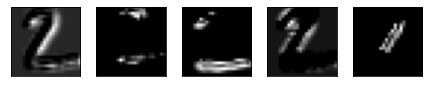

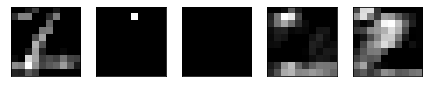

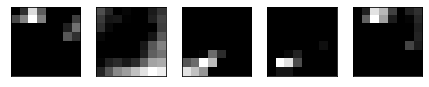

In [1]:
from tensorflow import keras
from keras import Model
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
import sys
sys.path.append('../..')

import experiments.mnistCentralized.mnist_centralized as Experiment

model_name= "MNIST-Centralized-B64-E100/Epoch-87"
model_from_disk = keras.models.load_model(f"models/{model_name}")
model_from_disk.summary()

conv_2d_layers = [0,1, 5,6]

outputs = [model_from_disk.layers[i].output for i in conv_2d_layers]
model_truncated = Model(inputs=model_from_disk.inputs, outputs=outputs)



_, _, _, _, (test_x, test_y) = Experiment.get_data(64, "False")

img = test_x[1]
img = np.expand_dims(img, axis=0)

print(img.shape)

feature_map = model_truncated.predict(img)


cols = 8
rows = 8

plot_per_convolution = 6
for ftr in feature_map:
    fig = plt.figure(figsize=(12,12))
    for i in range(1, plot_per_convolution):
        fig = plt.subplot(rows,cols,i)
        fig.set_xticks([])
        fig.set_yticks([])
        plt.imshow(ftr[0,:,:,i-1], cmap='gray')
    
    plt.show()
